# LT-DSC-Skript


## required libraries 

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from ltdsc_lib import *

Wähle manuell die relevanten Segmentpositionen aus in Form einer Liste. Z.B für Segment 6-8 und 14-16:

`measure_segments = [[6,8],[14,16]]`

In [2]:
measure_segments =  [ [7,9], [16,18]]

thaw_temp_range  =  [ [-47, 10], [-47, 10] ] # in °C

T_range = [[-48,-46], [8,10]]

## select a single measurement

  Found a valid experiment file. Encoding: UTF-16
  Loading M28n2-28d
    - loaded measurement M28n2-28d from 2025-02-06 12:50:00
    - The data contains 5.0 measurements per s


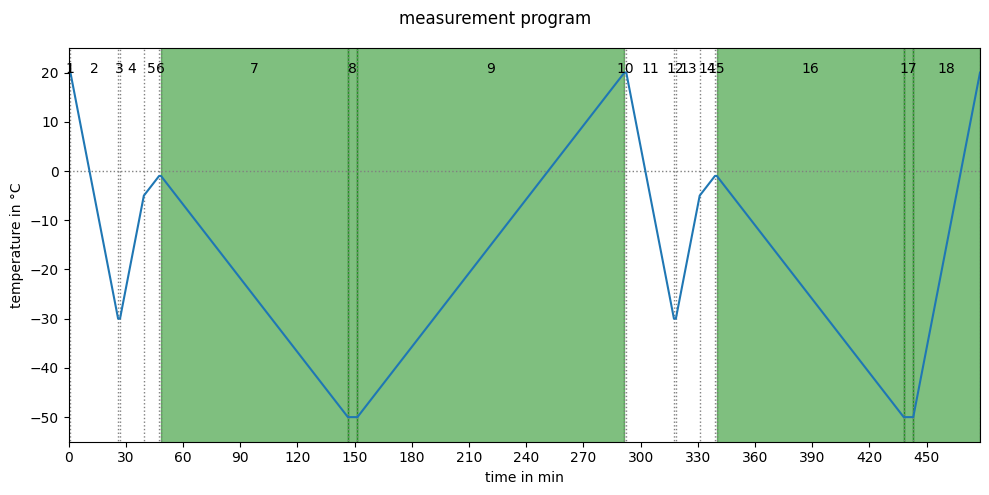

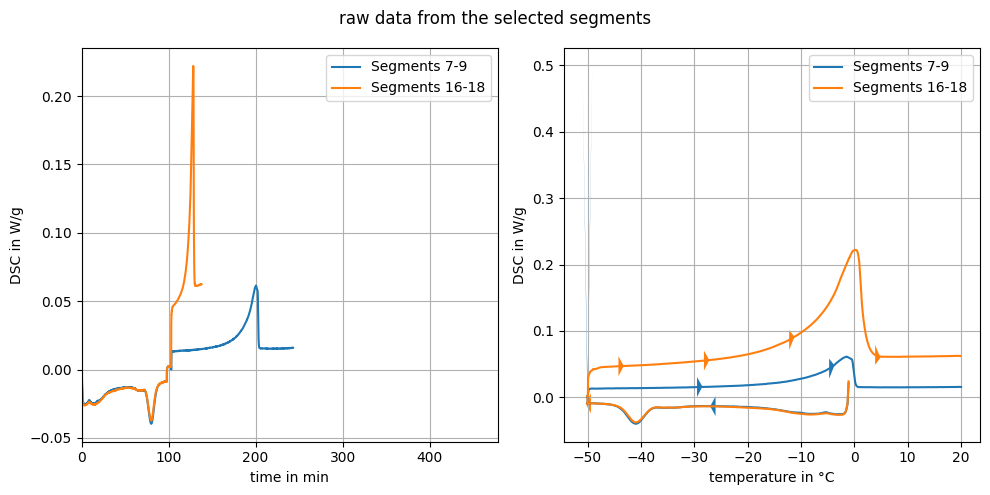

  Segment 9 baseline: y = 0.00001055*x + 0.01445076; R-squared value: 0.19686521
  Segment 9 baseline: y = 0.00001590*x + 0.01335190; R-squared value: 0.99268594
  Segment 18 baseline: y = 0.00048230*x + 0.04645574; R-squared value: 0.98917497
  Segment 18 baseline: y = 0.00054969*x + 0.04497080; R-squared value: 0.99977111


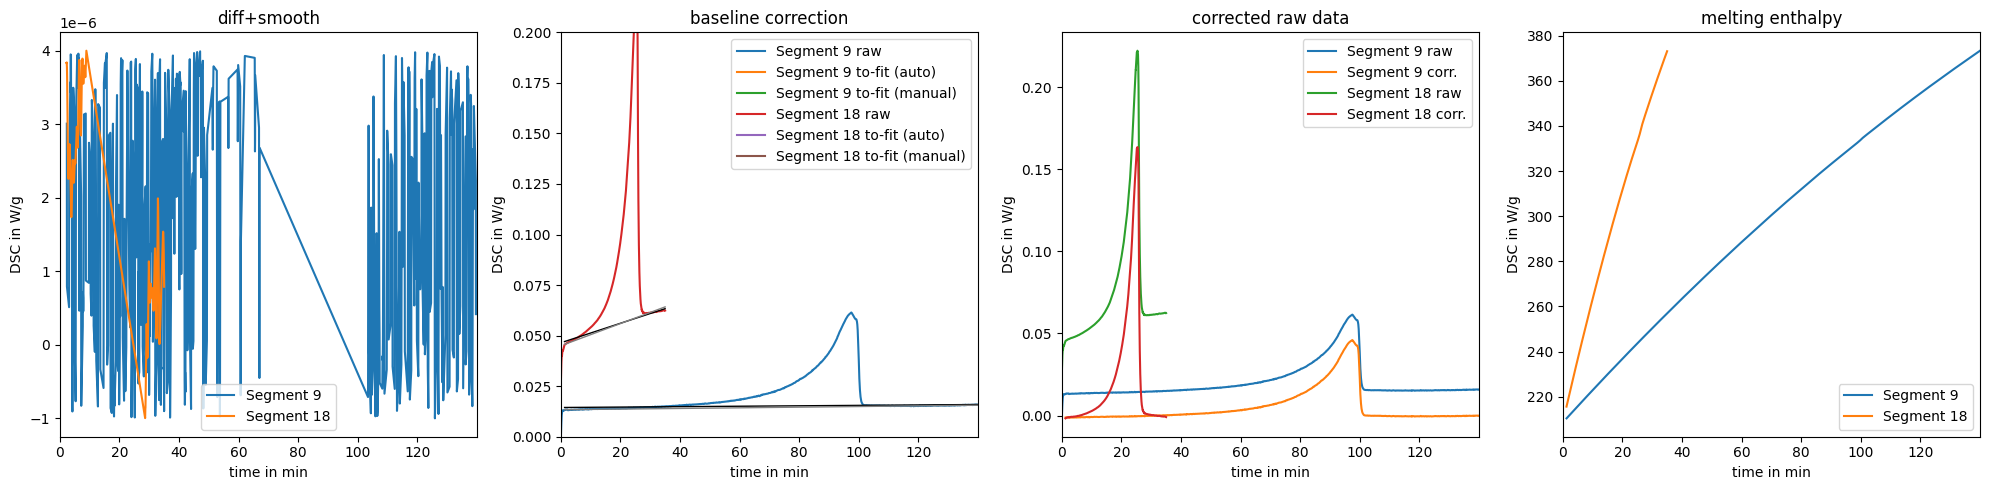

  INFO: measurement frequency changed from 5.00 to 0.42 measurements per second
  (auto) ice mass in segment 9 between -47 and 10 °C: 140.5 mg/g
  (manual) ice mass in segment 9 between -48 to -46 and 8 to 10 °C: 154.4 mg/g
  (auto) ice mass in segment 18 between -47 and 10 °C: 139.9 mg/g
  (manual) ice mass in segment 18 between -48 to -46 and 8 to 10 °C: 142.1 mg/g


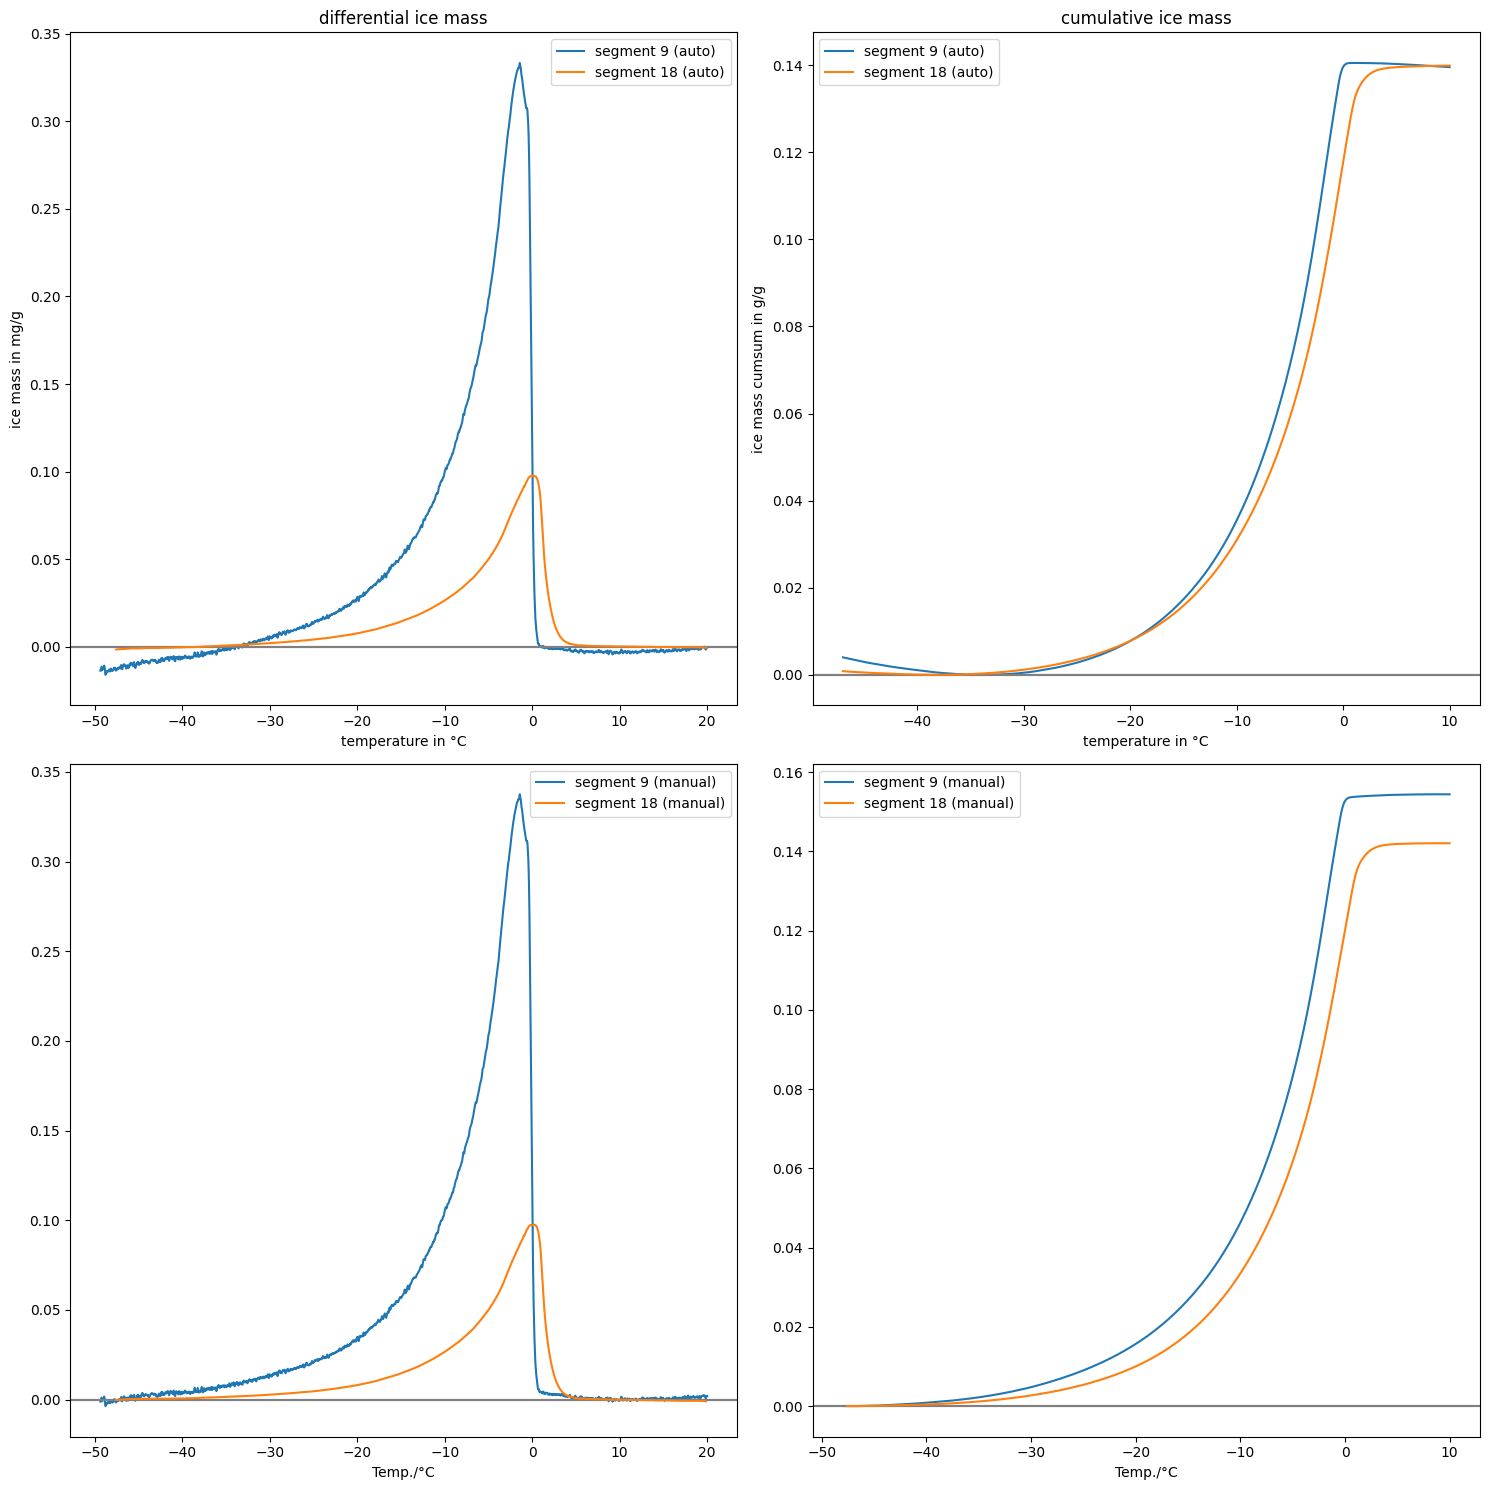

  ice mass difference: -0.61 mg/g


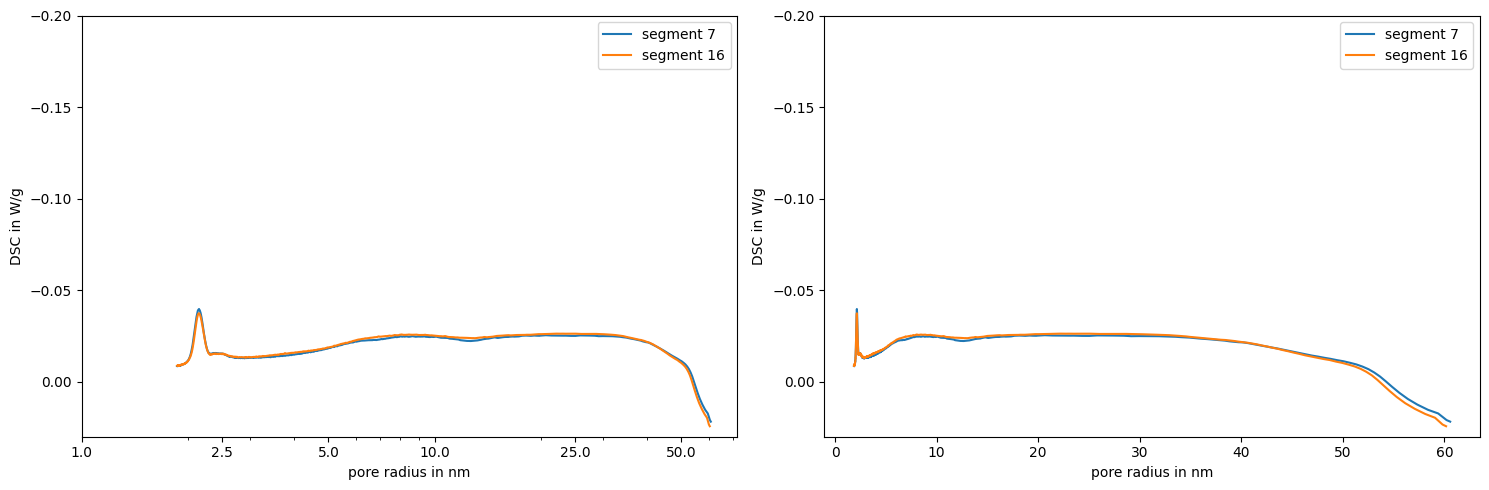

In [3]:
file = select_single_file()
experiment = ltdsc_measurement(file, measure_segments, thaw_temp_range, ignore_first_n_min = 1.25,T_range=T_range, verbose=True)

In [5]:
measure_segments =  [ [7,9], [16,18]]

thaw_temp_range  =  [ [-47, 10] ] # in °C

T_range = [[-47,-45], [9,11]]

file = select_single_file()
experiment = ltdsc_measurement(file, measure_segments, thaw_temp_range, ignore_first_n_min = 1.25, verbose=True)

FileNotFoundError: [Errno 2] No such file or directory: ''

## The following code is individual for the selected dataset

In [ ]:
directory, materials = load_multiple_experiments( measure_segments, thaw_temp_range, True )
specimen_ages = ['1d','7d','14d','21d','28d']
ice_dataframe, ice_stat_dataframe = process_ice_mass_dev( materials, specimen_ages )
    

0 TXT Dokumente gefunden.


In [ ]:

for experiment in materials.keys():
    fig, ax = plt.subplots(ncols=2, figsize=(15, 5))
    fig.suptitle(experiment, fontsize=16)
    for key, data in materials[experiment].items():
        for k, measure_segment in enumerate(measure_segments):
            for i in [0,1]:
                df_s = data.raw_data[(data.raw_data['Segment'] == measure_segment[0])]
                
                df_s.plot(             y='DSC/(mW/mg)', x ='pore radius in nm', ax=ax[i], label=key.format( measure_segment[0] ))
                ax[i].set_ylim(0,-.2)
                ax[i].set_xlim([1,200])
                ax[i].set_xlabel('pore radius in nm')
                ax[i].set_ylabel('DSC in W/g')
    ax[0].set_xscale('log')
    ax[0].set_xticks([1,2.5,5,10,25,50])
    ax[0].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

    plt.tight_layout()
    plt.show()